# AirBnB Berlin Price Prediction

## 0. Import modules

In [142]:
import pandas as pd
import numpy as np
import seaborn as sns
#
import matplotlib.pyplot as plt

#
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

#Modèle
from sklearn import tree

#Metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

import os

## 1. Preprocessing

### 1.0 Import des données

In [143]:
trainset = pd.read_csv(os.path.join('data/train_airbnb_berlin.csv'))
X = trainset.drop("Price", axis=1)
y = trainset["Price"]

### 1.1. Fonctions utiles

In [144]:
from lib2to3.pgen2.pgen import DFAState
from numpy import NaN


def nettoyer_nan_etoile(df):
    df=df.replace('*',NaN)
    df=df.dropna()
    return df

### 1.2 Premières observations

In [145]:
pd.set_option('display.max_columns',40)
trainset.head()

,Listing ID,Listing Name,Host ID,Host Name,Host Since,Host Response Time,Host Response Rate,Is Superhost,neighbourhood,Neighborhood Group,City,Postal Code,Country Code,Country,Latitude,Longitude,Is Exact Location,Property Type,Room Type,Accomodates,Bathrooms,Bedrooms,Beds,Square Feet,Guests Included,Min Nights,Reviews,First Review,Last Review,Overall Rating,Accuracy Rating,Cleanliness Rating,Checkin Rating,Communication Rating,Location Rating,Value Rating,Instant Bookable,Business Travel Ready,Price
0,19665213.0,*,156079597.0,Maximilian,2016-01-20,NaN,NaN,f,Prenzlauer Berg,Pankow,Berlin,10437.0,DE,Germany,52.54652,13.41792,t,Apartment,Private room,2,1.0,1.0,1.0,NaN,1,2,6,2017-07-07,2017-08-08,100.0,10.0,10.0,10.0,10.0,9.0,10.0,t,f,26.0
1,6436842.0,*,5302290.0,Dulie,2013-04-07,NaN,NaN,f,Pankow,Pankow,Berlin,13187.0,DE,Germany,52.56512,13.42214,t,Apartment,Entire home/apt,2,1.0,2.0,2.0,NaN,2,7,6,2015-05-26,2019-04-30,90.0,9.0,9.0,10.0,10.0,9.0,10.0,f,f,41.0
2,10559468.0,*,59151456.0,Geank,2016-02-07,NaN,NaN,f,Prenzlauer Berg,Pankow,Berlin,10439.0,DE,Germany,52.54741,13.42521,t,Apartment,Entire home/apt,3,1.0,1.0,2.0,NaN,1,1,2,2016-04-19,2016-07-04,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,f,50.0
3,27215482.0,*,193452785.0,Alix,2018-06-26,NaN,NaN,f,Friedrichshain,Friedrichshain-Kreuzberg,Berlin,10245,DE,Germany,52.50958,13.45144,t,Apartment,Private room,2,1.0,1.0,1.0,NaN,1,2,4,2018-07-31,2018-08-12,100.0,10.0,10.0,10.0,10.0,10.0,9.0,f,f,50.0
4,27287546.0,*,205870244.0,Lurina,2013-05-16,within a few hours,92%,t,Prenzlauer Berg,Pankow,Berlin,10405.0,DE,Germany,52.52995,13.41558,t,Apartment,Private room,3,1.0,1.0,2.0,NaN,1,6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,f,55.0


In [146]:
trainset.describe()

,Listing ID,Host ID,Latitude,Longitude,Square Feet,Reviews,Overall Rating,Accuracy Rating,Cleanliness Rating,Checkin Rating,Communication Rating,Location Rating,Value Rating,Price
count,1.569100e+04,1.569200e+04,15692.000000,15692.000000,303.000000,15692.000000,12730.000000,12721.000000,12722.000000,12719.000000,12722.000000,12721.000000,12720.000000,15683.000000
mean,1.780062e+07,6.119042e+07,52.509893,13.407334,445.900990,19.452014,94.717282,9.717475,9.328407,9.769164,9.779201,9.556874,9.458097,60.342983
std,9.952544e+06,6.739421e+07,0.031286,0.058646,414.817342,39.483853,7.069787,0.671793,1.023807,0.620347,0.619545,0.731109,0.788891,48.829687
min,2.241500e+04,1.101500e+04,52.369270,13.121400,0.000000,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,8.000000
25%,9.052831e+06,9.274528e+06,52.488920,13.376025,0.000000,1.000000,93.000000,10.000000,9.000000,10.000000,10.000000,9.000000,9.000000,32.000000
50%,1.865037e+07,3.358182e+07,52.509100,13.417250,440.000000,5.000000,97.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,49.000000
75%,2.611308e+07,9.325677e+07,52.532713,13.439750,700.000000,17.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,70.000000
max,3.467450e+07,2.609698e+08,52.639670,13.709020,1912.000000,424.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,900.000000


<AxesSubplot:>

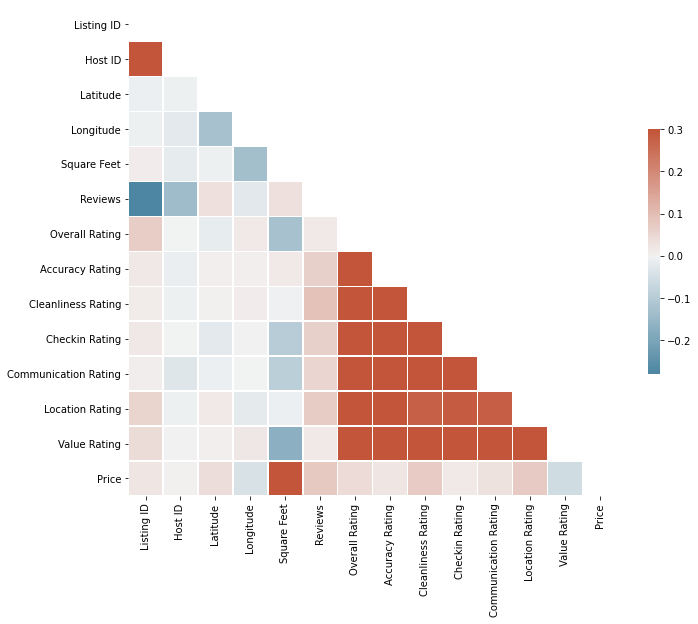

In [147]:
corr_matrix = trainset.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### 1.3 Corrélation

#### 1.3.1 Timestamp

La liste des features que je dois regarder est:  
<ol>
  <li>'Reviews'</li>
  <li>'First Review'</li>
  <li>'Last Review'</li>
  <li>'Overall Rating'</li>
  <li>'Accuracy Rating'</li>
  <li>'Cleanliness Rating'</li>
  <li>'Checkin Rating'</li>
  <li>'Communication Rating'</li>
  <li>'Location Rating'</li>
  <li>'Value Rating'</li>
</ol>

<AxesSubplot:>

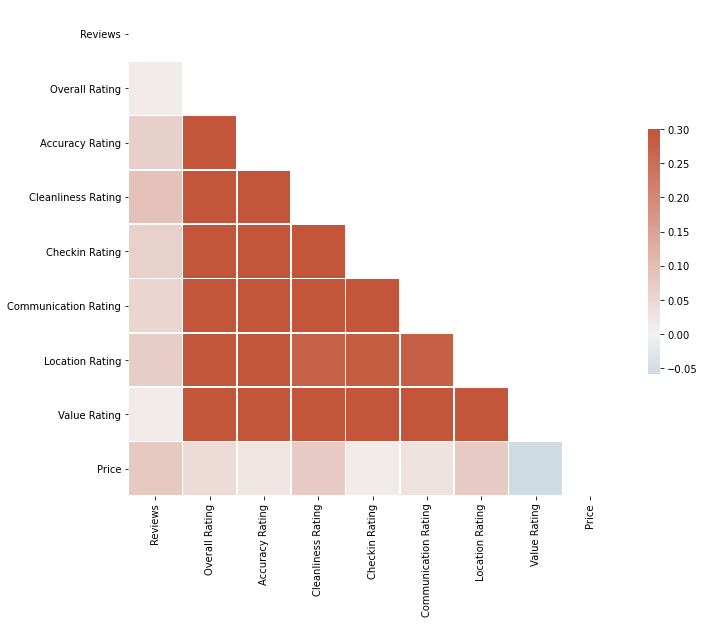

In [148]:
df=trainset[['Reviews','First Review','Last Review','Overall Rating','Accuracy Rating','Cleanliness Rating','Checkin Rating','Communication Rating','Location Rating','Value Rating','Price']]
corr_matrix = df.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [149]:
corr_matrix["Price"].sort_values(ascending=False)

Price                   1.000000
Reviews                 0.078231
Location Rating         0.076058
Cleanliness Rating      0.072634
Overall Rating          0.043537
Communication Rating    0.028882
Accuracy Rating         0.022770
Checkin Rating          0.014200
Value Rating           -0.057623
Name: Price, dtype: float64

In [150]:
df.head()

,Reviews,First Review,Last Review,Overall Rating,Accuracy Rating,Cleanliness Rating,Checkin Rating,Communication Rating,Location Rating,Value Rating,Price
0,6,2017-07-07,2017-08-08,100.0,10.0,10.0,10.0,10.0,9.0,10.0,26.0
1,6,2015-05-26,2019-04-30,90.0,9.0,9.0,10.0,10.0,9.0,10.0,41.0
2,2,2016-04-19,2016-07-04,100.0,10.0,10.0,10.0,10.0,10.0,10.0,50.0
3,4,2018-07-31,2018-08-12,100.0,10.0,10.0,10.0,10.0,10.0,9.0,50.0
4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.0


In [151]:
from datetime import datetime

df1=pd.DataFrame(pd.to_datetime(df['First Review'].dropna()))
df['timestamp'] = df1[['First Review']].apply(lambda x: x[0].timestamp(), axis=1).astype(int)
df['day FR']=pd.to_datetime(df['First Review']).dt.day
df['month FR']=pd.to_datetime(df['First Review']).dt.month
df['year FR']=pd.to_datetime(df['First Review']).dt.year

df1=pd.DataFrame(pd.to_datetime(df['Last Review'].dropna()))
df['timestamp LR'] = df1[['Last Review']].apply(lambda x: x[0].timestamp(), axis=1).astype(int)
df['day LR']=pd.to_datetime(df['Last Review']).dt.day
df['month LR']=pd.to_datetime(df['Last Review']).dt.month
df['year LR']=pd.to_datetime(df['Last Review']).dt.year

first_column = df.pop('Price')
df.insert(0, 'Price', first_column)
df.dropna
df

/var/folders/qn/6lf74ttj32jdlg3fhm_1bm240000gn/T/ipykernel_2894/4274739280.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['timestamp'] = df1[['First Review']].apply(lambda x: x[0].timestamp(), axis=1).astype(int)
/var/folders/qn/6lf74ttj32jdlg3fhm_1bm240000gn/T/ipykernel_2894/4274739280.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['day FR']=pd.to_datetime(df['First Review']).dt.day
/var/folders/qn/6lf74ttj32jdlg3fhm_1bm240000gn/T/ipykernel_2894/4274739280.py:6: SettingWithCopyWarning: 
A v

,Price,Reviews,First Review,Last Review,Overall Rating,Accuracy Rating,Cleanliness Rating,Checkin Rating,Communication Rating,Location Rating,Value Rating,timestamp,day FR,month FR,year FR,timestamp LR,day LR,month LR,year LR
0,26.0,6,2017-07-07,2017-08-08,100.0,10.0,10.0,10.0,10.0,9.0,10.0,1.499386e+09,7.0,7.0,2017.0,1.502150e+09,8.0,8.0,2017.0
1,41.0,6,2015-05-26,2019-04-30,90.0,9.0,9.0,10.0,10.0,9.0,10.0,1.432598e+09,26.0,5.0,2015.0,1.556582e+09,30.0,4.0,2019.0
2,50.0,2,2016-04-19,2016-07-04,100.0,10.0,10.0,10.0,10.0,10.0,10.0,1.461024e+09,19.0,4.0,2016.0,1.467590e+09,4.0,7.0,2016.0
3,50.0,4,2018-07-31,2018-08-12,100.0,10.0,10.0,10.0,10.0,10.0,9.0,1.532995e+09,31.0,7.0,2018.0,1.534032e+09,12.0,8.0,2018.0
4,55.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15687,45.0,11,2016-09-15,2019-01-02,98.0,10.0,9.0,10.0,10.0,10.0,10.0,1.473898e+09,15.0,9.0,2016.0,1.546387e+09,2.0,1.0,2019.0
15688,130.0,4,2016-04-15,2016-07-31,100.0,10.0,9.0,10.0,10.0,10.0,9.0,1.460678e+09,15.0,4.0,2016.0,1.469923e+09,31.0,7.0,2016.0
15689,19.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15690,100.0,6,2016-04-07,2018-08-07,90.0,10.0,10.0,10.0,10.0,10.0,9.0,1.459987e+09,7.0,4.0,2016.0,1.533600e+09,7.0,8.0,2018.0


<AxesSubplot:>

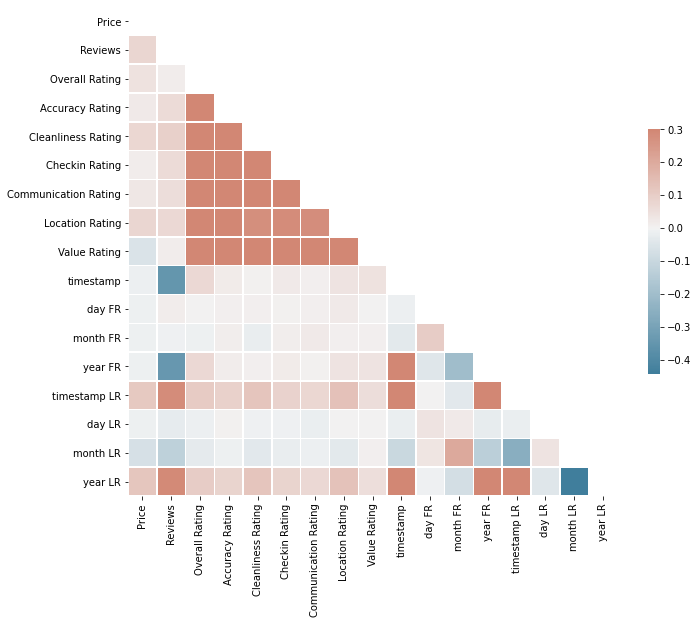

In [152]:
corr_matrix = df.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

On remarque que la date, le jour, le mois ou l'année n'a pas d'influence sur le prix pour la First Review... Néanmoins pour la Last Review, on voit que l'année est corrélée au prix.

In [153]:
corr_matrix["Price"].sort_values(ascending=False)

Price                   1.000000
year LR                 0.120416
timestamp LR            0.115048
Reviews                 0.078231
Location Rating         0.076058
Cleanliness Rating      0.072634
Overall Rating          0.043537
Communication Rating    0.028882
Accuracy Rating         0.022770
Checkin Rating          0.014200
month FR               -0.007213
day FR                 -0.007324
day LR                 -0.008869
year FR                -0.009834
timestamp              -0.011384
Value Rating           -0.057623
month LR               -0.066431
Name: Price, dtype: float64

### 1.4. Distribution

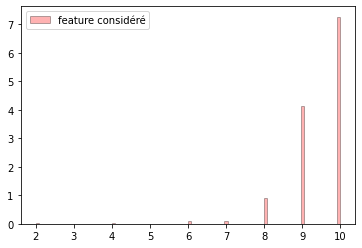

In [185]:
plt.hist(df['Value Rating'], edgecolor='black', bins=100, alpha=.3, density=True, color='red', label='feature considéré')
plt.legend()
plt.show()

## 2. Modèle

### 2.1. Decision Tree

In [159]:
pipeline =  Pipeline([
    ('std_scaler', StandardScaler()),
    ('clf', tree.DecisionTreeRegressor())
])

df=nettoyer_nan_etoile(df)
#print(trainset.columns.tolist()) Afficher toutes les colonnes
my_features=['Reviews','Overall Rating','Accuracy Rating','Cleanliness Rating','Checkin Rating','Communication Rating','Location Rating','Value Rating','year LR','month LR','Price']
df=df[my_features]

X = df.drop("Price", axis=1)
y = df["Price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
pipeline.fit(X_train, y_train)

pipeline.predict(X_test)
y_pred=pipeline.predict(X_test)
print(mean_squared_error(y_test,y_pred))

4329.213698041284
